In [14]:
import os
import pickle
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor, as_completed
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append(str(Path.cwd().parent))

In [15]:
# TODO: Update to import regression datasets

In [16]:
# Directory containing pickle files
directory = Path("../results/regression/quantitative")

# Optionally filter for specific substrings
pkl_files = [f for f in directory.iterdir() if f.suffix == ".pkl"]

# Efficient loader
def load_file(file_path):
    try:
        with open(file_path, "rb") as f:
            data = pickle.load(f)
            if isinstance(data, dict):
                return file_path.name, data
    except (EOFError, pickle.UnpicklingError) as e:
        print(f"Warning: Failed to load {file_path.name}: {e}")
    except Exception as e:
        print(f"Unexpected error with {file_path.name}: {e}")
    return None

# Load files using multithreading (I/O bound)
all_data = {}
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(load_file, f) for f in pkl_files]
    for future in as_completed(futures):
        result = future.result()
        if result:
            filename, data = result
            all_data[filename] = data

files = list(all_data.keys())


In [17]:
records = []

for file, dictionary in all_data.items():
    records.append(dictionary)

# Create the DataFrame
df = pd.DataFrame(records)

print(df.shape)



(144, 25)


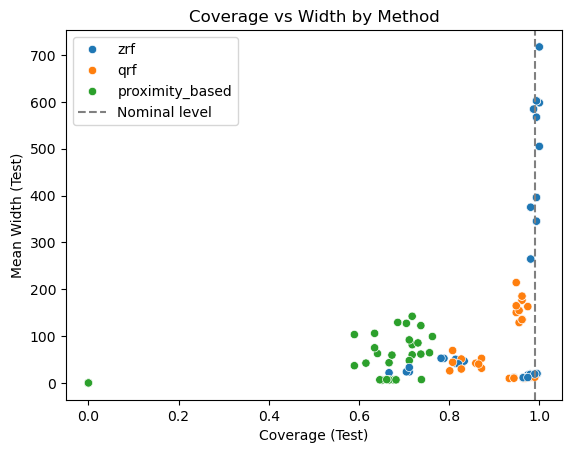

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='coverage_test', y='width_mean_test', hue='method')
plt.axvline(df['level'].iloc[0], color='gray', linestyle='--', label='Nominal level')
plt.xlabel('Coverage (Test)')
plt.ylabel('Mean Width (Test)')
plt.title('Coverage vs Width by Method')
plt.legend()
plt.show()


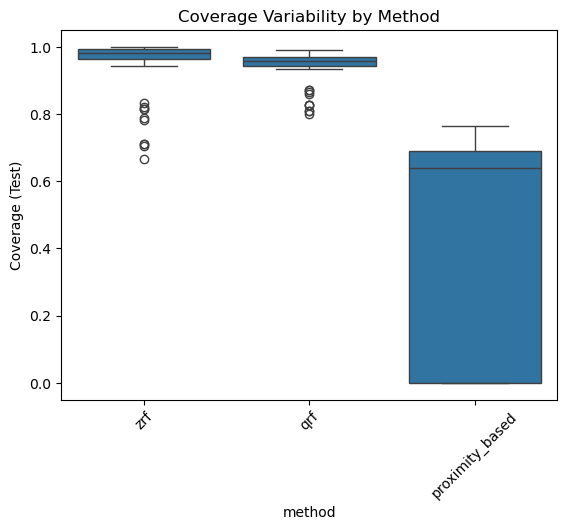

In [25]:
sns.boxplot(data=df, x='method', y='coverage_test')
plt.title('Coverage Variability by Method')
plt.ylabel('Coverage (Test)')
plt.xticks(rotation=45)
plt.show()


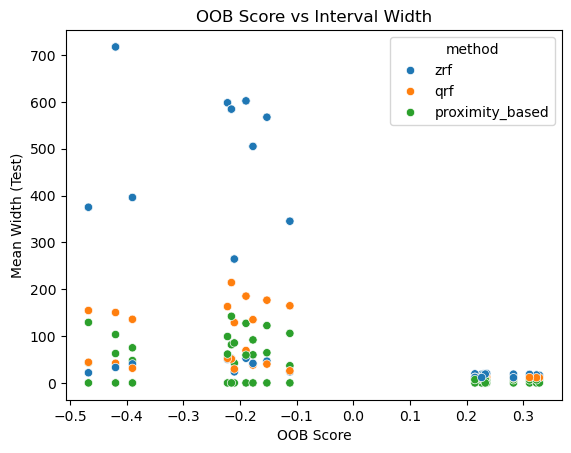

In [26]:
sns.scatterplot(data=df, x='oob_score_', y='width_mean_test', hue='method')
plt.xlabel('OOB Score')
plt.ylabel('Mean Width (Test)')
plt.title('OOB Score vs Interval Width')
plt.show()


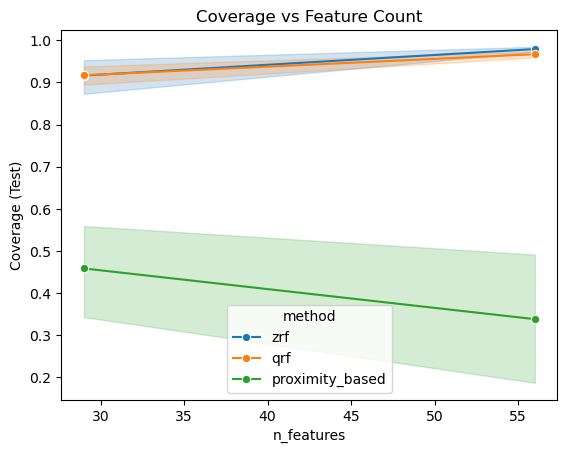

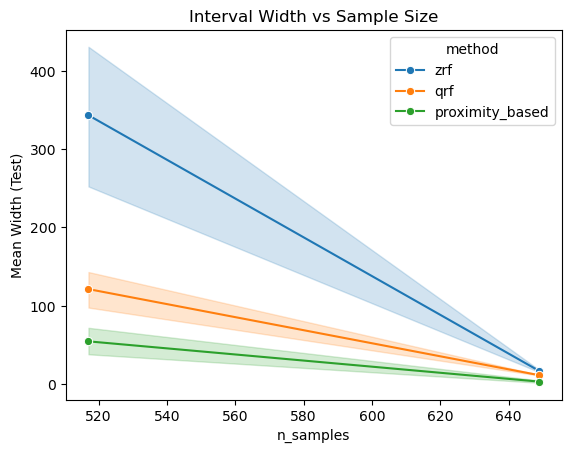

In [28]:
sns.lineplot(data=df, x='n_features', y='coverage_test', hue='method', marker='o')
plt.title('Coverage vs Feature Count')
plt.ylabel('Coverage (Test)')
plt.show()

sns.lineplot(data=df, x='n_samples', y='width_mean_test', hue='method', marker='o')
plt.title('Interval Width vs Sample Size')
plt.ylabel('Mean Width (Test)')
plt.show()


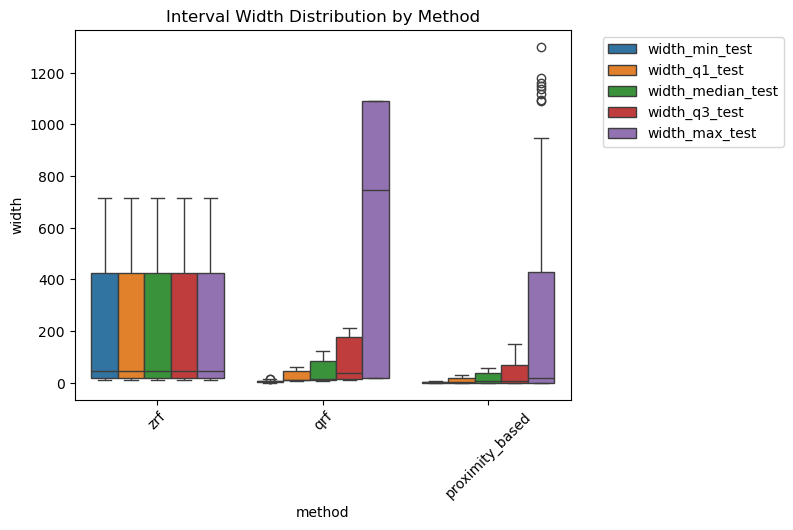

In [30]:
width_quantiles = df[['method', 'width_min_test', 'width_q1_test', 'width_median_test', 'width_q3_test', 'width_max_test']]
long_df = width_quantiles.melt(id_vars='method', var_name='quantile', value_name='width')

sns.boxplot(data=long_df, x='method', y='width', hue='quantile')
plt.title('Interval Width Distribution by Method')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


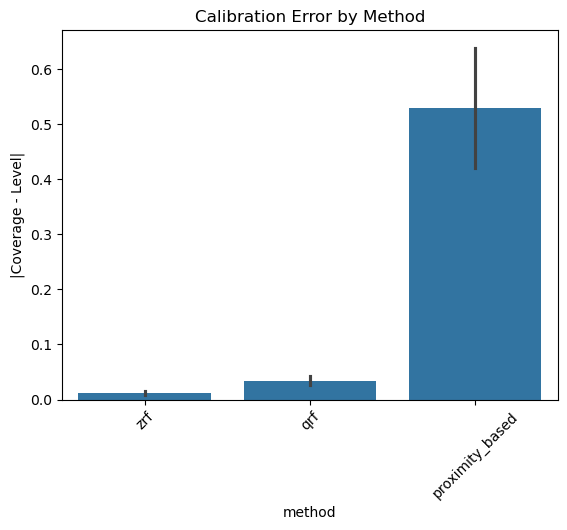

In [31]:
df['calibration_error'] = abs(df['coverage_test'] - df['level'])

sns.barplot(data=df, x='method', y='calibration_error')
plt.title('Calibration Error by Method')
plt.ylabel('|Coverage - Level|')
plt.xticks(rotation=45)
plt.show()


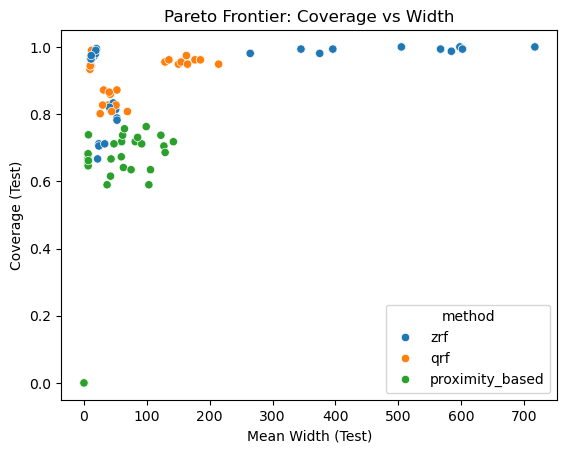

In [32]:
sns.scatterplot(data=df, x='width_mean_test', y='coverage_test', hue='method')
plt.xlabel('Mean Width (Test)')
plt.ylabel('Coverage (Test)')
plt.title('Pareto Frontier: Coverage vs Width')
plt.show()
